<a href="https://colab.research.google.com/github/lilreel/KampusMerdika_StudiIndependen_Zenius_AcceleratedMLProgram/blob/main/8.%20Topic15_16_HW_Chalil%20Al%20Vareel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised ML Python Homework

In [22]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/lilreel/Datasets/main/_Miscellaneous/unsupervised_ml_homework_data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [25]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=25)  

In [26]:
X_train.shape

(800, 20)

In [27]:
from sklearn.decomposition import PCA
pca_80 = PCA(0.8)

start_time = time.time()
pca_80.fit(X_train)
x_train_pca_80 = pca_80.transform(X_train)
x_test_pca_80 = pca_80.transform(X_test)
finish_time = time.time()

In [28]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('setelah dlakukan PCA, feature columns yang tersisa hanya sebanyak ', pca_80.n_components_, '.')
print('PCA berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/20))*100, '%')

PCA Fit and Transform finished in 0.01620173454284668 seconds.
setelah dlakukan PCA, feature columns yang tersisa hanya sebanyak  12 .
PCA berhasil mereduksi dataset sebanyak 40.0 %


In [29]:
pca_80.n_components_

12

Untuk mencapai 80%, hanya membutuhkan 12 kolom.

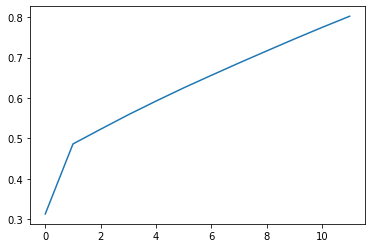

In [30]:
#Visualisasi
plt.plot(np.cumsum(pca_80.explained_variance_ratio_))
plt.show()

In [31]:
x_test_pca_80.shape

(200, 12)

In [32]:
x_test_pca_80

array([[ -2.62289954,  26.1370018 ,   5.61549999, ...,  -7.79814974,
          3.98079194,   0.20529211],
       [-21.4678443 , -18.40319153,  12.30475527, ...,  -5.97658981,
         -0.66215944,   3.69340609],
       [-12.66941987,  25.90857891,   2.82629317, ...,   5.1644616 ,
          6.21158953,   4.03103202],
       ...,
       [-15.20604079,  -9.69960088,  -4.41812184, ...,   1.56724817,
         -4.34715496,  -0.11731791],
       [-11.06075587,  17.71865897,   8.42229239, ...,  13.97459128,
          0.32094829,   4.14169016],
       [ 26.7271706 ,  -9.16585772,  -3.38558171, ...,   2.19577182,
         -3.00875182,   4.99327136]])

In [33]:
X_test.shape

(200, 20)

In [34]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
688,-7.965024,19.048826,-8.745751,11.296358,-6.557901,0.672336,5.571777,-4.578438,-6.519767,-12.766993,-21.745316,7.216813,1.791675,3.708619,6.778238,-9.073045,-2.496228,-8.255972,11.234515,5.979724
49,-3.493682,10.694086,12.239907,7.122669,0.417630,2.117950,9.519600,0.978967,14.689210,7.881473,4.867649,1.670394,-9.565965,-9.294443,-14.080992,-2.487612,18.978529,-2.656459,3.499464,7.571104
288,-6.908521,5.739378,-3.018503,3.032788,-1.845323,5.184894,15.354084,6.058484,-9.486867,-20.373408,-10.671964,15.979038,-1.590600,-14.895517,12.052134,3.232254,3.890036,-5.248845,17.679924,-1.294674
698,-7.950222,-4.700341,2.755615,7.049474,-10.147821,0.018544,16.945213,-7.830263,7.172357,9.186764,2.013741,-5.584002,-0.760595,-6.297685,-11.641042,1.289129,21.250042,-3.087780,4.764411,7.497929
775,-13.160300,-1.063255,5.283604,12.837788,-12.194439,-2.153346,12.764303,1.629498,5.591646,11.890306,13.535270,-10.046571,-11.912578,3.609059,-17.290100,-3.516890,13.754386,5.055489,4.971333,6.278584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,-15.131790,0.951328,-7.532450,10.065150,9.078049,15.819595,9.342442,0.354454,4.266571,-5.728855,-10.433408,12.158554,2.675178,-12.036166,4.173538,-6.842631,0.982506,-1.849012,-4.822984,8.580849
344,-2.815820,6.392991,8.125947,12.016406,-7.790378,4.097098,10.310291,0.123922,7.843136,5.783573,8.893663,-0.642162,-18.988032,2.042654,0.471212,-6.336538,7.770142,6.639956,6.058782,10.646308
135,2.566052,-1.756251,0.241192,18.621588,-3.694183,-6.710925,7.850367,0.276866,7.534633,0.219965,10.711635,-4.188233,-11.605495,-9.066394,-0.465847,-1.580881,9.374608,0.684252,4.318730,10.611280
735,-1.175830,4.174099,-2.694755,12.806534,-2.562329,5.581669,4.262966,6.878919,2.260970,6.948481,-10.243575,6.882969,-16.464479,-16.632642,14.864571,-13.924666,-6.820599,-8.995161,3.278193,9.234773


##### Jawab: Hasil PCA adalah mengambil 12 Principal Components. 

### Soal 2: K Means

In [35]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

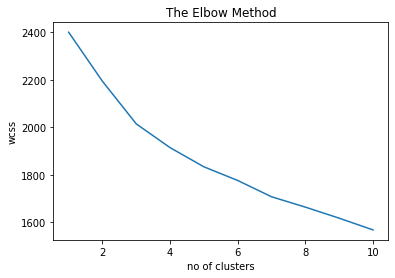

In [36]:
# Elbow Method
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x_test_pca_80)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

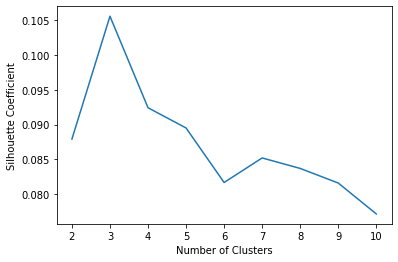

In [37]:
### Silhouette Score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x_test_pca_80)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k = ??

k = 3